In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    '../data/processed/job_offers.csv',
    sep=';',
    encoding='UTF-8')
df.head()

,name,company,technology,job,location.city,location.country,salary.low,salary.high,salary.currency,salary,salary_avg,is_senior
0,data engineer (microsoft),Onelo S.A.,NaN,data engineer,zdalna,B/D,13650.0,17850.0,PLN,NaN,15750.0,0
1,data engineer,Phorest,NaN,data engineer,zdalna,B/D,16773.0,23962.0,PLN,NaN,20367.5,0
2,data engineer,Ringier Axel Springer Tech,NaN,data engineer,zdalna,B/D,10100.0,16900.0,PLN,NaN,13500.0,0
3,scala big data engineer,VirtusLab,NaN,data engineer,zdalna,B/D,15000.0,22000.0,PLN,NaN,18500.0,0
4,software engineer (scala) | big data,Adform Sp. z o.o.,NaN,data engineer,zdalna,B/D,18000.0,21000.0,PLN,NaN,19500.0,0


job
data engineer       95
java developer     240
selenium           104
test automation     29
dtype: int64


<AxesSubplot:xlabel='job'>

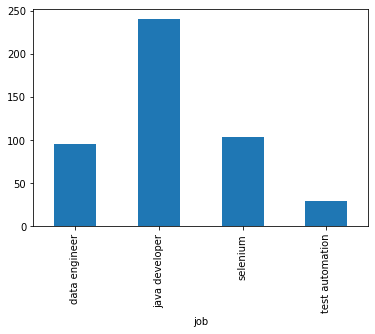

In [3]:
job_offers = df.groupby(by=['job']).size()

print(job_offers)
job_offers.plot.bar()

location.city  job            
białystok      java developer       3
budapest       data engineer        4
               java developer       8
               selenium             2
               test automation      1
bydgoszcz      java developer       2
debrecen       java developer       1
gdańsk         data engineer        1
               java developer       3
               test automation      1
gdynia         selenium             1
katowice       java developer       1
               selenium             2
               test automation      1
krakow         data engineer        1
kraków         data engineer        1
               java developer       5
               selenium             3
               test automation      1
malbork        data engineer        1
poznań         data engineer        3
               java developer       4
szczecin       selenium             1
trójmiasto     java developer       1
warszawa       data engineer        7
               java

<AxesSubplot:xlabel='location.city,job'>

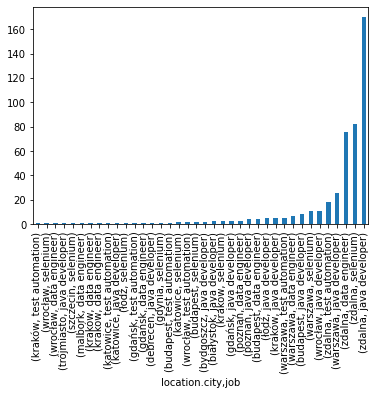

In [4]:
offers_by_city = df.groupby(by=['location.city', 'job']).size()

print(offers_by_city)
offers_by_city.sort_values().plot.bar()

                   salary_avg  count
job                                 
test automation  14343.844828     29
selenium         15303.225962    104
java developer   16921.081250    240
data engineer    20741.005263     95


array([[<AxesSubplot:title={'center':'salary_avg'}, xlabel='job'>,
        <AxesSubplot:title={'center':'count'}, xlabel='job'>]],
      dtype=object)

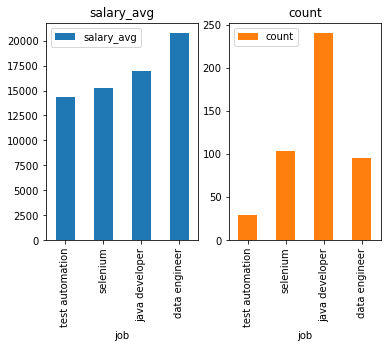

In [5]:
offer_salary = df.groupby(by=['job']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary.sort_values(by=['salary_avg'], inplace=True)
offer_salary.rename(columns={'name':'count'}, inplace=True)

print(offer_salary)
offer_salary.plot(subplots=True, layout=(1, 2), kind='bar')

In [6]:
offer_salary_by_city = df.groupby(by=['location.city']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary_by_city.sort_values(by=['salary_avg'], inplace=True)
offer_salary_by_city.rename(columns={'name':'count'}, inplace=True)

offer_salary_by_city

,salary_avg,count
location.city,,
szczecin,3750.000000,1
bydgoszcz,5500.000000,2
malbork,5500.000000,1
gdańsk,11650.000000,5
poznań,12357.142857,7
kraków,12386.550000,10
budapest,12758.466667,15
warszawa,12797.142857,49
katowice,12875.000000,4


<AxesSubplot:xlabel='location.city'>

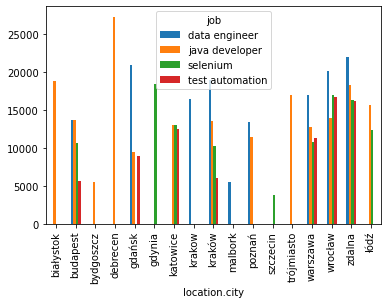

In [7]:
df.pivot_table(index='location.city', columns='job', values='salary_avg').plot(kind='bar')

In [8]:
salary_by_senior = df.groupby(by=['job', 'is_senior']).agg({'salary_avg': 'mean', 'name': 'count'})
salary_by_senior

salary_avg  name
job             is_senior                    
data engineer   0          19912.444444    81
                1          25534.821429    14
java developer  0          16421.792627   217
                1          21631.760870    23
selenium        0          14845.258427    89
                1          18020.500000    15
test automation 0          13872.538462    26
                1          18428.500000     3